<a href="https://colab.research.google.com/github/nug1209/PwC_Switzerland_Digital_Intelligence_Virtual_Case_Experience/blob/main/PwC_Task_5_R_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
library("tidyverse")
library("ggplot2")
library("readxl")

In [20]:
dfA2 <- read_excel("Task_5_Data_A2.xlsx")
# colnames(dfA2)
# head(dfA2)

In [22]:
dfA3 <- read_excel("Task_5_Data_A3.xlsx")
dfA3 <- dfA3 %>% rename(reaction_group = 'Reaction Group', case_count = 'Number of Cases')
dfA3 <- dfA3[!(dfA3$reaction_group == 'Total Cases'),]

head(dfA3)

reaction_group,case_count
<chr>,<dbl>
"Injury, Poisoning And Procedural Complications",1260
Psychiatric Disorders,1258
Nervous System Disorders,1237
General Disorders And Administration Site Conditions,1121
Gastrointestinal Disorders,569
"Respiratory, Thoracic And Mediastinal Disorders",460


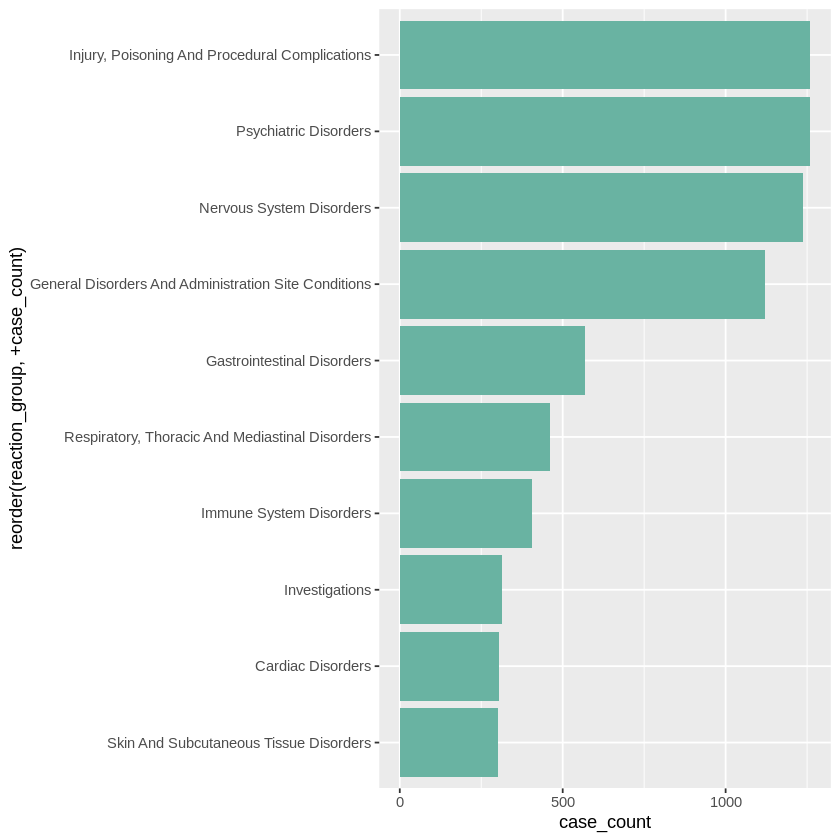

In [34]:
ggplot(head(dfA3, 10), aes(x = reorder(reaction_group, +case_count), y = case_count)) + geom_bar(stat='identity', fill='#69b3a2') + coord_flip()

In [24]:
dfA4_full <- read_excel("Task_5_Data_A4.xlsx")
# colnames(dfA4_full)
# head(dfA4_full)
nrow(dfA4_full)

In [26]:
dfA4 <- subset(dfA4_full, select=c(Reactions))
dfA4 <- dfA4 %>% rename(reaction = Reactions)
dfA4 <- dfA4 %>% separate_longer_delim(reaction, delim = ';')
# head(dfA4)

In [29]:
dfA4_freq <- table(dfA4$reaction)
dfA4_freq <- dfA4_freq[order(dfA4_freq, decreasing=FALSE)]
dfA4_freq <- tail(dfA4_freq, 10)
# dfA4_freq


                  Vomiting                     Nausea 
                       174                        178 
         Completed Suicide           Drug Ineffective 
                       180                        193 
                Somnolence            Drug Dependence 
                       201                        210 
          Drug Interaction                 Drug Abuse 
                       212                        286 
     Drug Hypersensitivity Toxicity To Various Agents 
                       355                        438 

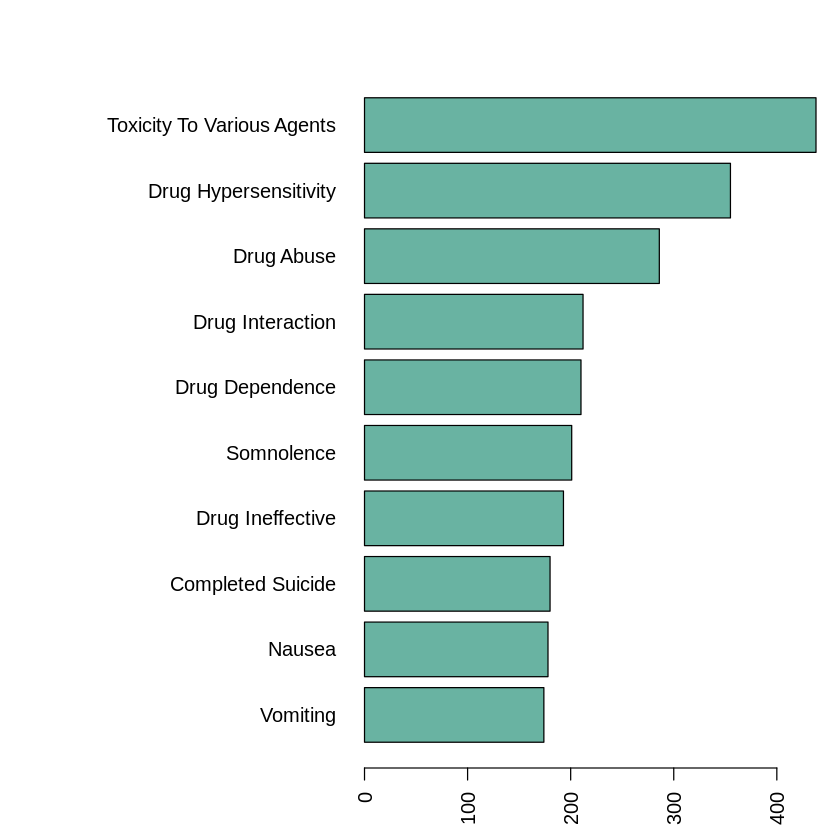

In [33]:
par(mar=c(3, 15, 3, 1))
barplot(dfA4_freq, horiz=TRUE, las=2, col='#69b3a2')